# Programming and Classification:
## 4. Similarity

### @author Krzysztof Agieńczuk
This notebook is available under the beerware license for educational purposes

In [1]:
import nltk
from nltk import ngrams
import random
import hashlib
import string
import sys
from datasketch import MinHash, MinHashLSH
import time
#nltk.download()

31. Generate a set S of n random bitstrings of length 100. Find min x,y∈S sha-1(x\\y), where x\\y denotes concatenation of bitstrings x and y. Estimate, what is the maximal n for this task that can be handled by your computer?

In [15]:
def generateBitString():
    bits = "01"
    return ''.join(random.choice(bits) for i in range(100))
    
amount = 4000
listOfStrings = list()
for i in range(amount):
    listOfStrings.append(generateBitString())

    
minimal = sys.float_info.max
hashFunction = hashlib.sha1()
start_time = time.time()
for i in range(len(listOfStrings)):
    for ii in range(len(listOfStrings)):
        words = listOfStrings[i] + listOfStrings[ii]
        hashFunction.update(words.encode('utf-8'))
        numericHash = int(hashFunction.hexdigest(), 16)
        if minimal > numericHash:
            minimal = numericHash
elapsed = time.time() - start_time 
print(elapsed)


setOfStrings = set()
for i in range(amount):
    setOfStrings.add(generateBitString())
    
start_time = time.time()
for element in setOfStrings:
    for element2 in setOfStrings:
        words = element + element2
        hashFunction.update(words.encode('utf-8'))
        numericHash = int(hashFunction.hexdigest(), 16)
        if minimal > numericHash:
            minimal = numericHash
elapsed = time.time() - start_time       
            
print(elapsed)

28.04100012779236
26.218000173568726


32. (use NLTK). Let S1, S2, S3 be the sets of all words shorter than 8 letters from text1,text2, text3, respectively. Compute signatures for S1, S2, S3 represented by 100 minhashes and then estimate Jaccard similarity between each pair of S1, S2, S3.

In [18]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [19]:
def chooseWords(S):
    wordsToConsider = set()
    for word in S:
        if len(word)<8:
            wordsToConsider.update(word)
    return wordsToConsider
            
S1 = chooseWords(set(text1))
S2 = chooseWords(set(text2))
S3 = chooseWords(set(text3))

m1, m2, m3 = MinHash(), MinHash(), MinHash()
for d in S1:
    m1.update(d.encode('utf8'))
for d in S2:
    m2.update(d.encode('utf8'))
for d in S3:
    m3.update(d.encode('utf-8'))
print("Estimated Jaccard for S1 and S2 is", m1.jaccard(m2))
print("Estimated Jaccard for S1 and S3 is", m1.jaccard(m3))
print("Estimated Jaccard for S2 and S3 is", m2.jaccard(m3))

Estimated Jaccard for S1 and S2 is 0.9765625
Estimated Jaccard for S1 and S3 is 0.796875
Estimated Jaccard for S2 and S3 is 0.796875


33. Compare the results from the previous exercise with the exact Jaccard similarity of sets S1, S2, S3. What if random permutation of the characteristic matrix rows were replaced with a random mapping?

In [20]:
def jaccardSimilaritySets(element1, element2):
    if element2 == []:
        return "empty"
    intersection = set(element1).intersection(set(element2))
    union = set(element1).union(set(element2))
    return float(len(intersection)/len(union))

print(jaccardSimilaritySets(S1, S2))
print(jaccardSimilaritySets(S1, S3))
print(jaccardSimilaritySets(S2, S3))

0.9493670886075949
0.7435897435897436
0.7402597402597403


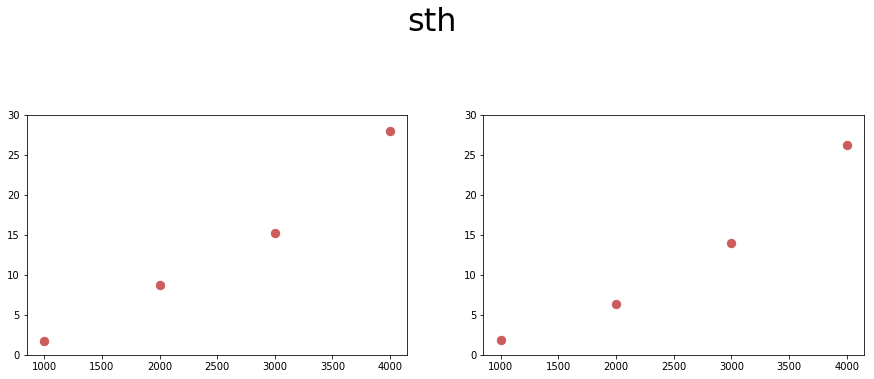

In [23]:
import matplotlib.pyplot as plt

x = [1000,2000,3000,4000]
Ylist = [1.748, 8.692, 15.21, 28.04]
Yset = [1.794, 6.397, 13.94, 26.28]
f = plt.figure(figsize=(15, 15)); # plot the calculated values  
f.suptitle("sth", fontsize = 32)

sp =  f.add_subplot(3, 2, 1 );
plt.scatter(x, Ylist, s=70, marker='o', color='IndianRed')
plt.ylim([0,30])

sp =  f.add_subplot(3, 2, 2 );
plt.scatter(x, Yset, s=70, marker='o', color='IndianRed')
plt.ylim([0,30])
plt.show()